# Overview #

This is demo Google collaborative notebook for downloading data from ONC to your own Google drive along. It also shows you how to...
- show datafields of downloaded datasets
- examine dataset with simple TSNE visualization


To view the file contents, stay on this page.

**To play (run and edit) this Python script...**

1. Click on ```Open in playground``` button 
2. Choose  Login to your Google account > ```Runtime``` (top menu, fifth item) > ```Run all``` (first item)
3. Click on ```RUN ANYWAY``` when prompted by the pop-up windown
4. Go through each code block below. Most critically, follow the 3-steps under code block ```A``` carefully to authenticate in order to run this entire script successfully














## A) Mount to your own Google drive ## 

1. Click on link (in blue)
2. Copy the authentication code (example authentication code:
```4/xwHlEYe2HDKq6XPPPdIbhVZIBf-hDyooaZJSST-k2Lv3IgarPvfeKvw```)

3. Return to browser's tab where the notebook is being viewed.
4. Paste the copied code into the text box. 
5. Press ENTER



In [0]:
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B) Use Unix commands to make and move to directory called ```opensource_datasets``` ##

In [0]:
try:
  ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/'
except e as Exception:
  pass
  
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/')


mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/opensource_datasets/’: File exists


## C) Create a subfolder ```ONC2020``` where ONC datasets will be downloaded to ##

In [0]:
try:
  ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/ONC2020/'
except e as Exception:
  pass
  
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/ONC2020')



mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/opensource_datasets/ONC2020/’: File exists


## D) Using ```wget``` to copy ONC data using API ##

Note: by default, returns request in json files; appending ```&format=csv``` at the end of query for csv files may work if length of query is known. Below will still download data in json files.



In [0]:
try:
  os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/ONC2020/')
  ! wget -O market-readiness2015.csv https://dashboard.healthit.gov/api/open-api.php?source=2015-edition-market-readiness-hospitals-clinicians-data.csv 

  
except:
  pass
try:  
  ! wget -O AHA_2008-2005.csv https://dashboard.healthit.gov/api/open-api.php?source=AHA_2008-2015.csv
except:
  pass

try:
  ! wget -O budget_performance_measures.csv https://dashboard.healthit.gov/api/open-api.php?source=performance-measures.csv
except:
  pass

try:
  ! wget -O prescription_adoption_by_country2014.csv https://dashboard.healthit.gov/api/open-api.php?source=Surescripts_County_04-2014.csv
  # ! wget -O prescription_adoption_by_state2014.csv https://dashboard.healthit.gov/api/open-api.php?source=Surescripts_State_04-2014.csv
  ! wget -O prescription_adoption_by_state2014.csv https://dashboard.healthit.gov/datadashboard/data/Surescripts_04-2014_State.csv
except:
  pass




--2020-03-22 23:45:52--  https://dashboard.healthit.gov/api/open-api.php?source=2015-edition-market-readiness-hospitals-clinicians-data.csv
Resolving dashboard.healthit.gov (dashboard.healthit.gov)... 54.86.156.245
Connecting to dashboard.healthit.gov (dashboard.healthit.gov)|54.86.156.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 0 [application/json]
Saving to: ‘market-readiness2015.csv’

market-readiness201     [ <=>                ]       0  --.-KB/s    in 0s      

2020-03-22 23:45:53 (0.00 B/s) - ‘market-readiness2015.csv’ saved [0/0]

--2020-03-22 23:45:53--  https://dashboard.healthit.gov/api/open-api.php?source=AHA_2008-2015.csv
Resolving dashboard.healthit.gov (dashboard.healthit.gov)... 54.86.156.245
Connecting to dashboard.healthit.gov (dashboard.healthit.gov)|54.86.156.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘AHA_2008-2005.csv’

AHA_2008-2005.csv       [  <=>     

## E) List the files downloaded to your Google drive ##

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/ONC2020/')

import glob
files = glob.glob('*csv')

for f in files:
  print(f)  

AHA_2008-2005.csv
performance-measures.csv
budget_performance_measures.csv
prescription_adoption_by_country2014.csv
prescription_adoption_by_state2014.csv
market-readiness2015.csv


## F) Import modules for displaying tabular data in HTML format ##

In [0]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))


## G) Loop over this list of datasets (files) and show the header and 1 example data entry within each file. ##

In [0]:
import pandas as pd
import numpy as np

dfs=dict()

for f in files:
  try:
      k=f.strip('.csv')
      data = pd.read_json(f)
      #data = pd.read_json(f,dtype=float ).replace('',np.NaN).replace( '.', np.NaN)
      dfs[k] = data
      print( '\nContents of %s.csv:' % k )   
      display(HTML( dfs[k].head(2).transpose().to_html() ))
  except Exception as e:     
    print(f, e) 



Contents of AHA_2008-2005.csv:


,0,1
region,National,Alaska
region_code,US,AK
period,2015,2015
pct_hospitals_basic_ehr_notes,0.84,0.89
pct_rural_hospitals_basic_ehr_notes,0.8,0.83947572
pct_small_hospitals_basic_ehr_notes,0.81,0.869637303
pct_critical_access_hospitals_basic_ehr_notes,0.8,0.83947572
pct_hospitals_basic_ehr_no_notes,0.88,0.893633791
pct_rural_hospitals_basic_ehr_no_notes,0.830268773,0.83947572
pct_small_hospitals_basic_ehr_no_notes,0.833448248,0.869637303



Contents of performance-measure.csv:


,0,1
measure,Percent of office-based physicians who have adopted a Basic EHR,Percent of office-based physicians who have adopted a Basic EHR
measure_year,2009,2009
measure_type,actual,target
measure_value,21,
measure_status,,



Contents of budget_performance_measure.csv:


,0,1
measure,Percent of office-based physicians who have adopted a Basic EHR,Percent of office-based physicians who have adopted a Basic EHR
measure_year,2009,2009
measure_type,actual,target
measure_value,21,
measure_status,,



Contents of prescription_adoption_by_country2014.csv:


,0,1
Region,Alabama,Alabama
Region Code,AL,AL
County Name,Autauga,Baldwin
State FIPS,1,1
County FIPS,1,3
FIPS,1001,1003
Period,2014-04,2014-04
Percent of Physicians Actively Using an EHR to e_Prescribe via the Surescripts Network,0.33,0.68


prescription_adoption_by_state2014.csv Expected object or value
market-readiness2015.csv Expected object or value


## Repeat above step but this time, mark missing data with NaN ##

In [0]:
dfs=dict()

for f in files:
  try:
      k=f.strip('.csv')
      data = pd.read_json(f,dtype=float ).replace('',np.NaN).replace( '.', np.NaN)
      dfs[k] = data
      print( '\nContents of %s.csv:' % k )   
      display(HTML( dfs[k].head(2).transpose().to_html() ))
  except Exception as e:     
    print(f, e) 



Contents of AHA_2008-2005.csv:


,0,1
region,National,Alaska
region_code,US,AK
period,2015,2015
pct_hospitals_basic_ehr_notes,0.84,0.89
pct_rural_hospitals_basic_ehr_notes,0.8,0.83947572
pct_small_hospitals_basic_ehr_notes,0.81,0.869637303
pct_critical_access_hospitals_basic_ehr_notes,0.8,0.83947572
pct_hospitals_basic_ehr_no_notes,0.88,0.893633791
pct_rural_hospitals_basic_ehr_no_notes,0.830268773,0.83947572
pct_small_hospitals_basic_ehr_no_notes,0.833448248,0.869637303



Contents of performance-measure.csv:


,0,1
measure,Percent of office-based physicians who have adopted a Basic EHR,Percent of office-based physicians who have adopted a Basic EHR
measure_year,2009,2009
measure_type,actual,target
measure_value,21,NaN
measure_status,NaN,NaN



Contents of budget_performance_measure.csv:


,0,1
measure,Percent of office-based physicians who have adopted a Basic EHR,Percent of office-based physicians who have adopted a Basic EHR
measure_year,2009,2009
measure_type,actual,target
measure_value,21,NaN
measure_status,NaN,NaN



Contents of prescription_adoption_by_country2014.csv:


,0,1
Region,Alabama,Alabama
Region Code,AL,AL
County Name,Autauga,Baldwin
State FIPS,1,1
County FIPS,1,3
FIPS,1001,1003
Period,2014-04,2014-04
Percent of Physicians Actively Using an EHR to e_Prescribe via the Surescripts Network,0.33,0.68


prescription_adoption_by_state2014.csv Expected object or value
market-readiness2015.csv Expected object or value


 New Section

 New Section

In [0]:
! wget -O prescription_adoption_by_state2014.csv https://dashboard.healthit.gov/api/open-api.php?source=Surescripts_04-2014_State.csv

dfs['prescription_adoption_by_state2014']=pd.read_json( 'prescription_adoption_by_state2014.csv' )   
    


--2020-03-22 23:46:00--  https://dashboard.healthit.gov/api/open-api.php?source=Surescripts_04-2014_State.csv
Resolving dashboard.healthit.gov (dashboard.healthit.gov)... 54.86.156.245
Connecting to dashboard.healthit.gov (dashboard.healthit.gov)|54.86.156.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘prescription_adoption_by_state2014.csv’

prescription_adopti     [   <=>              ]   1.41M  2.74MB/s    in 0.5s    

2020-03-22 23:46:01 (2.74 MB/s) - ‘prescription_adoption_by_state2014.csv’ saved [1483148]



In [0]:
dfs['prescription_adoption_by_state2014'].head(2).transpose()

,0,1
region,National,National
region_code,US,US
period,2008,2009
tot_e_Rx,,
tot_e_Rx_thru_ehr,,
tot_e_Rx_thru_stand_alone,,
tot_primary_care_e_Rx,,
tot_non_primary_care_e_Rx,,
tot_nurse_prac_e_Rx,,
tot_phys_asst_e_Rx,,


In [0]:
#! wget -O market-readiness2015.csv https://dashboard.healthit.gov/datadashboard/data/2015-edition-market-readiness-hospitals-clinicians-data.csv
! wget -O market-readiness2015.csv https://dashboard.healthit.gov/api/open-api.php?source=2015-edition-market-readiness-hospitals-clinicians-data.csv

# file is empty (0 bytes transferred); do not read, nothing to read
#dfs['market-readiness2015']=pd.read_json( 'market-readiness2015.csv' )   

--2020-03-22 23:46:02--  https://dashboard.healthit.gov/api/open-api.php?source=2015-edition-market-readiness-hospitals-clinicians-data.csv
Resolving dashboard.healthit.gov (dashboard.healthit.gov)... 54.86.156.245
Connecting to dashboard.healthit.gov (dashboard.healthit.gov)|54.86.156.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 0 [application/json]
Saving to: ‘market-readiness2015.csv’

market-readiness201     [ <=>                ]       0  --.-KB/s    in 0s      

2020-03-22 23:46:02 (0.00 B/s) - ‘market-readiness2015.csv’ saved [0/0]



In [0]:
for k in dfs.keys():  
  print('%s.csv contains cells of size'%k, dfs[k].shape)  

AHA_2008-2005.csv contains cells of size (417, 29)
performance-measure.csv contains cells of size (337, 5)
budget_performance_measure.csv contains cells of size (337, 5)
prescription_adoption_by_country2014.csv contains cells of size (2938, 8)
prescription_adoption_by_state2014.csv contains cells of size (3825, 15)


## H) Examine ```AHA_2008-2005.csv``` more closely ##

In [0]:
import pandas as pd
import numpy as np

k='AHA_2008-2005'


print('This file contains cells of size', dfs[k].shape)  # 417 samples each with 29 attributes

display(HTML(dfs[k].head(2).transpose().to_html() ) )


This file contains cells of size (417, 29)


,0,1
region,National,Alaska
region_code,US,AK
period,2015,2015
pct_hospitals_basic_ehr_notes,0.84,0.89
pct_rural_hospitals_basic_ehr_notes,0.8,0.83947572
pct_small_hospitals_basic_ehr_notes,0.81,0.869637303
pct_critical_access_hospitals_basic_ehr_notes,0.8,0.83947572
pct_hospitals_basic_ehr_no_notes,0.88,0.893633791
pct_rural_hospitals_basic_ehr_no_notes,0.830268773,0.83947572
pct_small_hospitals_basic_ehr_no_notes,0.833448248,0.869637303


## I) Extract the numeric variables out of this dataset for subsequent data analyses ##

In [0]:
# ID's are first 2 columns (region and region_code)

data = dfs[k].iloc[:,2::].values
labels = dfs[k].iloc[:,1].values

import numpy as np

cdata = np.zeros( data.shape )

for c in range( 2,data.shape[1] ):
  cc=c-2
  cdata[:,cc]=pd.to_numeric( dfs[k].iloc[:,c] )
  print(cc, np.nanmin( cdata[:,cc] ), np.nanmax( cdata[:,cc]), dfs[k].columns[c] , )


0 2008.0 2015.0 period
1 0.07 1.0 pct_hospitals_basic_ehr_notes
2 0.0 1.0 pct_rural_hospitals_basic_ehr_notes
3 0.0 1.0 pct_small_hospitals_basic_ehr_notes
4 0.0 1.0 pct_critical_access_hospitals_basic_ehr_notes
5 0.01 1.0 pct_hospitals_basic_ehr_no_notes
6 0.0 1.0 pct_rural_hospitals_basic_ehr_no_notes
7 0.0 1.0 pct_small_hospitals_basic_ehr_no_notes
8 0.0 1.0 pct_critical_access_hospitals_basic_ehr_no_notes
9 0.72 1.0 pct_hospitals_cehrt
10 0.758553914 1.0 pct_small_rural_hospitals_cehrt
11 0.8396548290000001 1.0 pct_cah_hospitals_cehrt
12 0.16 1.0 pct_hospitals_share_labs_any_outside_provs
13 0.0 1.0 pct_hospitals_share_labs_any_outside_hospitals
14 0.16 1.0 pct_hospitals_share_labs_any_outside_ambu_provs
15 0.23 1.0 pct_hospitals_patients_ecopy_ehr
16 0.26 1.0 pct_hospitals_patients_ecopy_discharge_instr
17 0.11 1.0 pct_hospitals_share_care_summaries_any_outside_provs
18 0.0 0.884738116 pct_hospitals_share_care_summaries_any_outside_hospitals
19 0.07 1.0 pct_hospitals_share_care_su

## J) Set missing values to ```-1``` ##


In [0]:
cdata[np.isnan(cdata)]=-1


## K) Perform dimensionality reduction using TSNE; the output data should have 2 dimensions ##

In [0]:
from sklearn.manifold import TSNE
cdata_embedded = TSNE(n_components=2).fit_transform(cdata)
cdata_embedded.shape

(417, 2)

## L) Plot a histogram of data distribution by region-codes ##

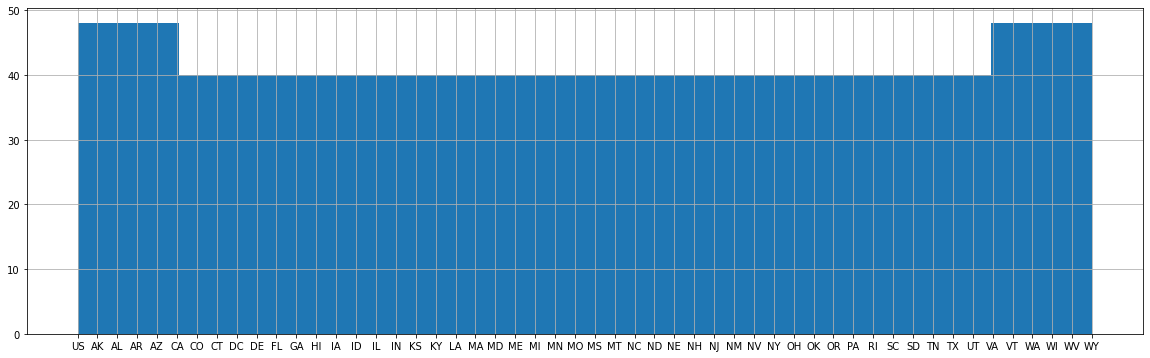

In [0]:
labels = dfs[k].iloc[:,1].values

import matplotlib.pyplot as plt
%matplotlib  inline

fig,axes=plt.subplots(1,1, figsize=( 20, 6 ));
dfs[k].region_code.hist();

 

## M) Query the rows with labels ```ND``` ##

In [0]:
np.where( labels=='ND' )[0]


array([ 29,  81, 133, 185, 237, 289, 341, 393])

## N) Reduce the data of 417-2 variables into 2 dimensions and visualize the groupings by ```region code``` ##

AK (-30.69,-2.57), AK (-20.84,-18.21), AK (10.17,22.41), AK (-1.50,15.77), AK (-11.33,30.21), AK (23.56,-6.89), AK (18.77,-21.78), AK (4.67,-12.23), 
AL (-29.10,-1.08), AL (-21.90,-19.61), AL (8.11,21.61), AL (-0.82,15.76), AL (-13.13,30.82), AL (24.13,-7.03), AL (16.07,-19.60), AL (5.98,-12.54), 
AR (-28.59,-1.14), AR (-23.00,-20.38), AR (10.46,22.97), AR (-0.99,14.73), AR (-11.94,31.55), AR (22.85,-6.62), AR (16.28,-18.78), AR (11.37,-13.69), 
AZ (-29.09,1.12), AZ (-22.54,-18.83), AZ (8.61,21.38), AZ (-0.12,14.45), AZ (-11.77,30.64), AZ (22.79,-5.29), AZ (17.15,-14.86), AZ (6.55,-11.95), 
32 data pts


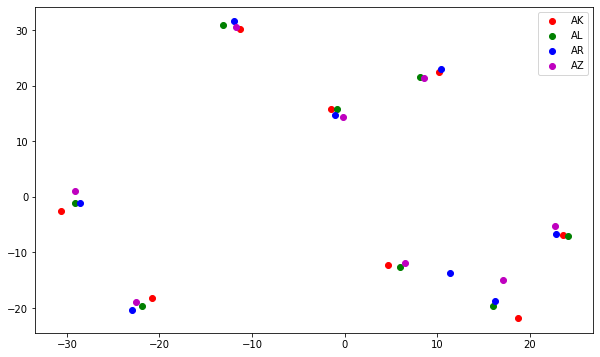

In [0]:
grps=['AK', 'AL', 'AR', 'AZ']
clrs=['r','g','b','m', 'c', 'k' ]

fig,axes=plt.subplots(1,1, figsize=( 10, 6 ))
data_pts=[]

for i, c in enumerate( grps ): # finish list to include all 6 words here
    q = np.where( labels == c )[0]   
    for qq in q:
      print(  c, '(%.2f,%.2f)' %(cdata_embedded[qq,0], cdata_embedded[qq,1]), end=', ' )
      data_pts.append(qq)
    print('')
    plt.scatter( cdata_embedded[q,0], cdata_embedded[q,1], color=clrs[i], label=c )
    
    plt.legend()    

print( len(data_pts), 'data pts' )